# TASK 1-  Getting familiarized with Pennylane.

The tutorials in the Pennylane codebook are a good way to get started. We recommend the codebooks from the sections “Introduction to Quantum Computing”, “Single-Qubit Gates” and “Circuits with Many Qubits”.Document your
progress and share your learnings as you follow these Pennylane tutorials.

## Introduction to Quantum Computing

### All about Qubits

 Regular computers, referred to as classical computers, represent information as bits. A bit is a binary value. It can be either 0 or 1, and this is associated to something physical being in two different states. Quantum computers use special bits, called quantum bits, or qubits.Quantum computing is the manipulation of qubits to solve problems. Mathematically, A qubit is represented by a state, which is a column vector of two elements. The two most basic ones are the analogues of a bit's "0" and "1" state, which are represented by the following two vectors:



Qubit state 0 = |0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}\ 
Qubit state 1 = |1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}\.


The state vector of a qubit is called a ket

Superposition:- 

What makes qubits so special is that they can exist in a superposition state somewhere between  |0> and |1>.  Mathematically, the state of a qubit in superposition is a linear combination of the basis states $\alpha$ |0> + $\beta$ |1> = | $\psi$>

Operations on Qubits are performed by unitary matrices. Furthermore, the coefficients of those linear combinations tell us about the likelihood of a qubit being in one of those two states after measurement. Preparing states, performing operations, and taking measurements are the building blocks of all quantum algorithms.

### EXERCISE 

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\641190711.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


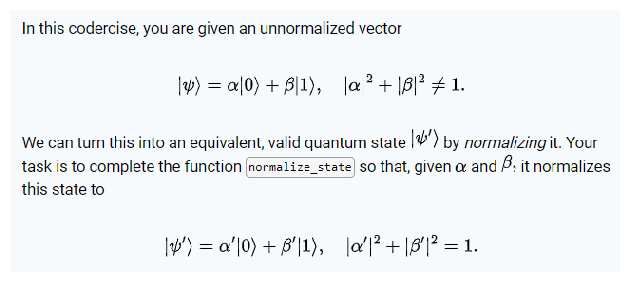

In [4]:
import cv2
from skimage.io import imshow
import matplotlib.pyplot as plt
img = imshow("q1.png")
plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
import numpy as np

# Define the basis states |0> and |1>
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    # Calculate the norm of the state vector
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    
    # Create the normalized vector [a', b']
    normalized_vector = np.array([alpha, beta]) / norm
    
    return normalized_vector


### EXERCISE

Complete the inner_product function below that computes the inner product between two arbitrary states. Then, use it to verify that  ket (0) and ket (1)  form an orthonormal basis, i.e., the states are normalized and orthogonal.

In [6]:
import numpy as np
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    inner_product_value = np.vdot(state_1, state_2)
    
    return inner_product_value

    # COMPUTE AND RETURN THE INNER PRODUCT


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


### EXERCISE

Write the function measure_state that takes a quantum state vector as input and simulates the outcomes of an arbitrary number of quantum measurements, i.e., return a list of samples  or  based on the probabilities given by the input state.

In [7]:
import numpy as np

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """
    # Compute the probability of measuring |0> and |1>
    prob_0 = np.abs(state[0])**2
    prob_1 = np.abs(state[1])**2
    
    # Ensure the probabilities sum to 1 (this should be the case if the state is normalized)
    assert np.isclose(prob_0 + prob_1, 1), "Probabilities do not sum to 1. The state might not be normalized."
    
    # Perform the measurement num_meas times
    outcomes = np.random.choice([0, 1], size=num_meas, p=[prob_0, prob_1])
    
    return outcomes

# Example usage
state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # |+> state
num_meas = 1000
measurements = measure_state(state, num_meas)
print(f"Number of 0s: {np.sum(measurements == 0)}")
print(f"Number of 1s: {np.sum(measurements == 1)}")

Number of 0s: 496
Number of 1s: 504


### Quantum Circuits

Quantum circuits are a way to visually depict the sequence of operations that are performed on qubits throughout the course of a computation. 

A circuit starts with a collection of wires that represent a set of qubits. Qubits are ordered from top to bottom, and typically labelled numerically in the same order. We will label starting from 0 to match most quantum programming frameworks. A group of qubits together is called a quantum register.

Operations on qubits are often called gates. There are many different types of gates, which have different effects on the qubits. Some gates affect only one qubit at a time, whereas others might affect two (or more) qubits.

The number of gates, and the type of gates, are useful metrics. However, one particularly important metric is that of circuit depth. The depth is the number of time steps it takes for a circuit to run, if we do things as in-parallel as possible. Alternatively, it can be called as the number of layers in a circuit.

In PennyLane, a quantum circuit is represented by a quantum function. These are just regular Python functions, with some special properties: they must apply one or more quantum operations, and return one or more quantum measurements.

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\1134673318.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


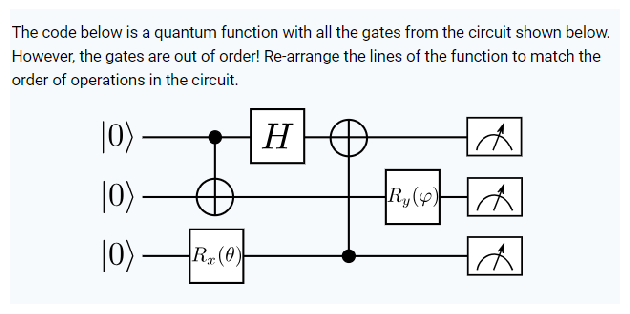

In [9]:
img = imshow("q2.png")
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE
    qml.CNOT(wires=[0, 1]) 
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)        # Hadamard gate
    qml.CNOT(wires=[2, 0])       
    qml.RY(phi, wires=1)  

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\2689510432.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


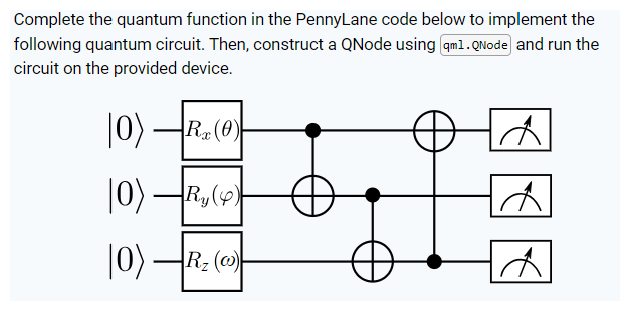

In [12]:
img = imshow("q3.png")
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# This creates a device with three wires on which PennyLane can run computations
import pennylane as qml
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    
    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### Unitary matrices

Learning Objectives:

 - Define what it means for a matrix to be unitary.
 - Express a single-qubit unitary operation in terms of 3 real parameters.

Complete the quantum function below to create a circuit that applies U to the qubit and returns its state. 

In [13]:
import pennylane as qml
import numpy as np

# Define the device
dev = qml.device("default.qubit", wires=1)

# Define the unitary matrix U
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # Use QubitUnitary to apply U to the qubit
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()

# Call the function to apply the unitary and print the resulting state
state = apply_u()
print(state)


[0.70710678+0.j 0.70710678+0.j]
